# Определение перспективного тарифа для телеком компании

#1. [Описание проекта](#description)
#2. [Инструкция по выполнению проекта](#instruction)
#3. [Загрузка файла](#loading)
#4. [Подготовка данных к анализу](#preparation)
#5. [Анализ данных](#analysis)
#6. [Проверка гипотез](#hypothesis)
#7. [Общий вывод](#output)

<a name="description"></a>
# Описание проекта

Вы аналитик компании "Мегалайн" - федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: "Смарт" и "Ультра". Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей "Мегалайна": кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод - какой тариф лучше. 

Описание тарифов

Тариф «Смарт»

1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
•	минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
•	сообщение: 3 рубля
•	1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
•	минута разговора: 1 рубль
•	сообщение: 1 рубль
•	1 Гб интернет-трафика: 150 рублей


<a name="instruction"></a>
# Инструкция по выполнению проекта

    Шаг 1. Открыть файл с данными и изучить общую информацию.

    Шаг 2. Подготовить данные.

    Шаг 3. Проанализировать данные.

    Шаг 4. Проверить гипотезы.

    Шаг 5. Написать общий вывод.

<a name="loading"></a>
**Шаг 1. Загрузка файла.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import copy



In [2]:
# выведем первые 5 строк
#users.head()

In [3]:
# выведем первые 5 строк
#calls.head()

In [4]:
# выведем первые 5 строк
#messages.head()

In [5]:
# выведем первые 5 строк
#internet.head()

In [6]:
# выведем первые 5 строк
#tariffs.head()

Описание данных:

Таблица users (информация о пользователях):
1. user_id — уникальный идентификатор пользователя
2. first_name — имя пользователя
3. last_name — фамилия пользователя
4. age — возраст пользователя (годы)
5. reg_date — дата подключения тарифа (день, месяц, год)
6. churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
7. city — город проживания пользователя
8. tariff — название тарифного плана


Таблица calls (информация о звонках):
1. id — уникальный номер звонка
2. call_date — дата звонка
3. duration — длительность звонка в минутах
4. user_id — идентификатор пользователя, сделавшего звонок


Таблица messages (информация о сообщениях):
1. id — уникальный номер сообщения
2. message_date — дата сообщения
3. user_id — идентификатор пользователя, отправившего сообщение


Таблица internet (информация об интернет-сессиях):
1. id — уникальный номер сессии
2. mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
3. session_date — дата интернет-сессии
4. user_id — идентификатор пользователя


Таблица tariffs (информация о тарифах):
1. tariff_name — название тарифа
2. rub_monthly_fee — ежемесячная абонентская плата в рублях
3. minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
4. messages_included — количество сообщений в месяц, включённых в абонентскую плату
5. mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
6. rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
7. rub_per_message — стоимость отправки сообщения сверх тарифного пакета
8. rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


<a name="preparation"></a>
**Шаг 2. Подготовка данных к анализу.**

**users**

In [7]:
#посмотрим на сводную информацию о наборе данных
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропуски в столбце churn_date, но по условию задачи, если значение пропущено, то тариф еще действовал на момент выгрузки данных, поэтому не заполняем. 

* user_id - int64 - не трогаем.
* age - int64 - не трогаем.
* churn_date - object - переведем в тип дата.
* city - object - не трогаем.
* first_name - object - не трогаем.
* last_name - object - не трогаем.
* reg_date - object - переведем в тип дата.
* tariff - object - не трогаем.

In [8]:
# переведем столбец churn_date в тип дата
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y.%m.%d %H:%M:%S')

In [9]:
# переведем столбец reg_date в тип дата
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d %H:%M:%S')

**calls**

In [10]:
#посмотрим на сводную информацию о наборе данных
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Все данные заполнены, пропусков нет.

* id - object - не трогаем.
* сall_date - object - переведем в тип дата.
* duration - float64 - округлим вверх.
* user_id - int64 - не трогаем.

In [11]:
# переведем столбец call_date в тип дата
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d %H:%M:%S')

In [12]:
# округлим вверх
calls['duration'] = calls['duration'].apply(np.ceil)

In [13]:
#calls.head()

У большого количества звонков длительность - 0.0 минут.
Это реальные данные, поэтому мы не будем их заменять. 

In [14]:
# добавим столбец month 
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

**messages**

In [15]:
#посмотрим на сводную информацию о наборе данных
#messages.info()

Все данные заполнены, пропусков нет.

* id - object - не трогаем.
* message_date - object - переведем в тип дата.
* user_id - int64 - не трогаем.

In [16]:
# переведем столбец message_date в тип дата
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d %H:%M:%S')

Добавим столбец month, т.к. в задании необходимо выяснить количество смс по месяцам.

In [17]:
# добавим столбец month 
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

**internet**

In [18]:
#посмотрим на сводную информацию о наборе данных
#internet.info()

Все данные заполнены, пропусков нет.

* id - object - не трогаем.
* mb_used - float64 - округлим вверх.
* session_date - object - переведем в тип дата.
* user_id - int64 - не трогаем.

In [19]:
# округлим вверх
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [20]:
# переведем столбец session_date в тип дата
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d %H:%M:%S')

In [21]:
# добавим столбец month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

**tariffs**

In [22]:
# посмотрим на сводную информацию о наборе данных
#tariffs.info()

В таблице tariffs ничего не меняем.

***Посчитаем для каждого пользователя:***

In [23]:
# количество звонков по месяцам
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'id':'calls_month'})\

In [24]:
#user_calls.head()

In [25]:
# количество отправленных сообщений по месяцам
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_month'})

In [26]:
#user_messages.head()

In [27]:
# объем израсходованного интернет-трафика по месяцам
user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_month'})

In [28]:
#user_internet.head()

Методом merge создадим таблицу со звонками, смс, интернетом по месяцам и добавим таблицу с тарифами.

In [29]:
# посчитаем выручку от звонков
revenue = user_calls.merge(user_messages, on=['user_id', 'month'], how = 'outer')

In [30]:
#revenue.head()

In [31]:
# посчитаем выручку от интернета
revenue = revenue.merge(user_internet, on=['user_id','month'], how = 'outer')

In [32]:
#revenue.head()

In [33]:
revenue = revenue.merge(users, on='user_id', how='outer')

In [34]:
#revenue.head()

In [35]:
tariffs.rename(columns=lambda x: x.replace('tariff_name','tariff'), inplace=True)

In [36]:
# посчитаем выручку от тарифа
revenue = revenue.merge(tariffs, on='tariff', how='outer')

In [37]:
#revenue.head()

Помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [38]:
# посчитаем помесячную выручку с каждого пользователя
def revenue_id(i):
    calls = (i['calls_month'] - i['minutes_included']) * i['rub_per_minute']
    messages = (i['sms_month'] - i['messages_included']) * i['rub_per_message']
    internet = np.ceil((i['mb_month'] - i['mb_per_month_included']) / 1024) * i['rub_per_gb']
    total = 0
    for n in [calls, messages, internet]:
        if n > 0:
            total += n
    return total

In [39]:
revenue['revenue_id'] = revenue.apply(lambda x: revenue_id(x), axis=1)

In [40]:
revenue['total_revenue'] = revenue['rub_monthly_fee'] + revenue['revenue_id']

In [41]:
#revenue.sort_values(by='total_revenue').head()

На данном этапе мы привели данные к нужным типам, а именно столбцы: churn_date,reg_date, сall_date, message_date, session_date - перевели в тип data; столбцы duration, mb_used - округлили вверх.

Заменили пропуски на нулевые значения.

Посчитали для каждого пользователя:
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.


<a name="analysis"></a>
**Шаг 3. Анализ данных**

Создадим таблицы по тарифам, smart и ultra. 

In [42]:
# создадим таблицы по тарифам smart и ultra
smart = revenue[revenue['tariff'] == 'smart']
ultra = revenue[revenue['tariff'] == 'ultra']

In [43]:
# выведем первые 5 строк
#smart.head()

In [44]:
# выведем первые 5 строк
#ultra.head()

In [45]:
# посмотрим отсутствующие признаки, изучим средние значения и стандартные отклонения
smart[['duration', 'sms_month', 'mb_month']].describe()

,duration,sms_month,mb_month
count,2223.000000,1922.000000,2228.000000
mean,419.062978,38.716441,16236.472621
std,189.325618,26.787949,5868.824472
min,0.000000,1.000000,0.000000
25%,285.000000,17.000000,12668.500000
50%,423.000000,34.000000,16532.000000
75%,545.500000,55.000000,20068.000000
max,1435.000000,143.000000,38610.000000


In [46]:
# посмотрим отсутствующие признаки, изучим средние значения и стандартные отклонения
ultra[['duration', 'sms_month', 'mb_month']].describe()

,duration,sms_month,mb_month
count,951.000000,795.000000,975.000000
mean,545.451104,61.161006,19686.767179
std,306.925754,45.931026,9952.057054
min,0.000000,1.000000,0.000000
25%,310.000000,24.000000,12020.500000
50%,528.000000,51.000000,19411.000000
75%,756.500000,87.500000,26920.500000
max,1673.000000,224.000000,49789.000000


В месяц пользователям тарифа SMART, требуется:
    * Минут разговора: 419
    * Сообщений: 38
    * Мегабайт интернета: 16236
    
В месяц пользователям тарифа ULTRA, требуется:

    * Минут разговора: 545
    * Сообщений: 61
    * Мегабайт интернета: 19686

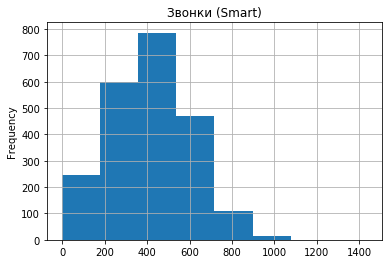

In [47]:
# построим график по тарифам для звонков
smart['duration'].plot(kind='hist', bins = 8, grid=True, title='Звонки (Smart)');

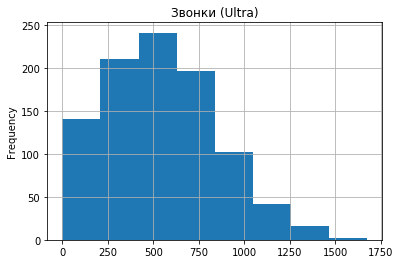

In [48]:
# построим график по тарифам для звонков
ultra['duration'].plot(kind='hist', bins = 8, grid=True, title='Звонки (Ultra)');

**Звонки**
             
Клиенты с тарифом Smart в среднем разговаривают от 300 до 500 минут. В пакет включены 500 минут, поэтому пользователи не приобретают дополнительные минуты.

Клиенты с тарифом Ultra в среднем разговаривают от 400 до 600 минут. В пакет включены 3000 минут, поэтому пользователи также не приобретают дополнительные минуты.

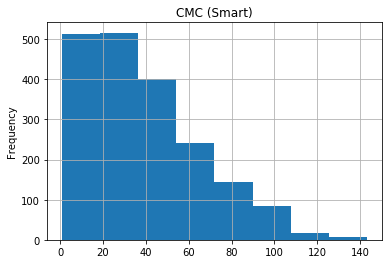

In [49]:
# построим график по тарифам для смс
smart['sms_month'].plot(kind='hist', bins = 8, grid=True, title='СМС (Smart)');

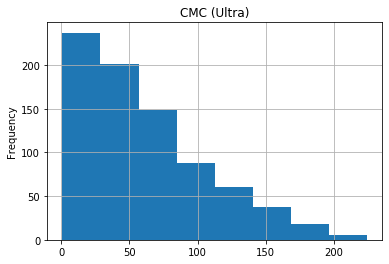

In [50]:
# построим график по тарифам для смс
ultra['sms_month'].plot(kind='hist', bins = 8, grid=True, title='СМС (Ultra)');

**Сообщения**

Пользователи почти не пользуются смс.

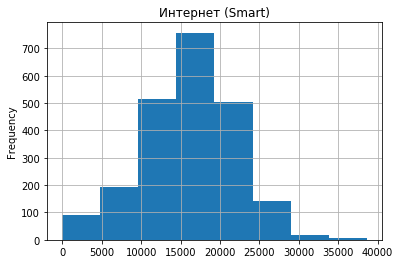

In [51]:
# построим график по тарифам для интернета
smart['mb_month'].plot(kind='hist', bins = 8, grid=True, title='Интернет (Smart)');

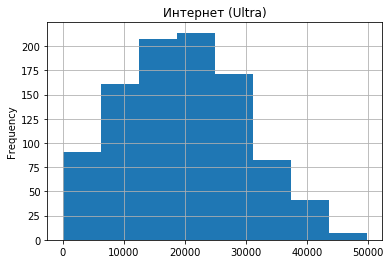

In [52]:
# построим график по тарифам для интернета
ultra['mb_month'].plot(kind='hist', bins = 8, grid=True, title='Интернет (Ultra)');

**Интернет**

Клиенты с тарифом Smart в среднем в месяц используют от 15 до 18 Гб трафика. Согласно тарифу, в пакет включены 30 ГБ интернета, таким образом пользователи тарифа Smart укладываются в стандартный пакет.

Клиенты с тарифом Ultra в среднем в месяц используют от 15 до 20 Гб трафика.  Согласно тарифу, в пакет включены лишь 15 ГБ интернета, что говорит нам о покупке дополнительного пакета.




In [53]:
# посмотрим количество клиентов тарифа smart
smart['user_id'].count()

2230

In [54]:
# посмотрим количество клиентов тарифа ultra
ultra['user_id'].count()

986

In [55]:
# узнаем среднее
smart[['duration', 'sms_month', 'mb_month']].mean()

duration       419.062978
sms_month       38.716441
mb_month     16236.472621
dtype: float64

In [56]:
# узнаем среднее
ultra[['duration', 'sms_month', 'mb_month']].mean()

duration       545.451104
sms_month       61.161006
mb_month     19686.767179
dtype: float64

In [57]:
# узнаем среднее
smart['total_revenue'].mean()

1169.544394618834

In [58]:
# узнаем среднее
ultra['total_revenue'].mean()

2070.943204868154

Опишем поведение клиентов оператора исходя из каждого тарифа. 
Тарифом Smart пользуются на 44.22 % больше, чем тарифом Ultra. 

Количество пользователей тарифа Smart - 2230.
Один пользователь тарифа Smart в среднем платит за обслуживание - 1169 руб.
Включено в тариф /среднее количество использовано на Smart:

* calls - 500/419;
* sms - 50/38;
* mb - 15000/16236;

Количество пользователей тарифа Ultra - 986.
Один пользователь тарифа Ultra в среднем платит за обслуживание - 2070 руб. Включено в тариф /среднее количество использовано на Ultra:

* calls - 3000/545;
* sms - 1000/61;
* mb - 30000/19686;

Несмотря на то, что абонентская плата на тарифе Smart ниже, за счет количества пользователей, тариф Smart приносит компании больше дохода, нежели тариф Ultra.

<a name="hypothesis"></a>
**Шаг 4. Проверка гипотез**

Сформулируем гипотезу № 1

Нулевая гипотеза H0  - выручка тарифов Smart и Ultra не различается.
Альтернативная гипотеза H1 - выручка тарифов Smart и Ultra различается.

Зададим alpha (критический уровень статистической значимости) - .05

In [59]:
alpha = 0.05

results = st.ttest_ind(smart['total_revenue'], ultra['total_revenue'], equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0
Отвергаем нулевую гипотезу


Выручка тарифов Smart и Ultra различается.

Сформулируем гипотезу № 2

Нулевая гипотеза H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Альтернативная гипотеза H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Зададим alpha (критический уровень статистической значимости) - .05

Создадим таблицы, в которыз разделим пользователей из Москвы и остальных пользователей.

In [60]:
#revenue.head()

In [61]:
moscow = revenue[revenue['city'] == 'Москва']
other = revenue[revenue['city'] != 'Москва']

In [62]:
#moscow.head()

In [63]:
#other.head()

In [64]:
moscow.pivot_table(index = 'tariff', values = 'total_revenue', aggfunc = 'count')
other.pivot_table(index = 'tariff', values = 'total_revenue', aggfunc = 'count')

alpha = 0.05
results = st.ttest_ind(moscow['total_revenue'], other['total_revenue'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.27357188086762696
Не получилось отвергнуть нулевую гипотезу


Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Таким образом, выручка тарифов Smart и Ultra различается. 
А вот выручка по Москве и регионам нет.

<a name="output"></a>
**Шаг 5. Общий вывод**

В данном анализе мы проделали следующие шаги:
1. Мы привели данные к нужным типам, а именно столбцы: churn_date,reg_date, сall_date, message_date, session_date - перевели в тип data; столбцы duration, mb_used - округлили вверх.
2. Посчитали для каждого пользователя:
 * количество отправленных сообщений по месяцам;
 * объем израсходованного интернет-трафика по месяцам;
 * помесячную выручку с каждого пользователя.
3. Выяснили:
 * Клиенты с тарифом Smart в среднем разговаривают от 300 до 400 минут. В пакет включены 500 минут, поэтому пользователи не приобретают дополнительные минуты.
 * Клиенты с тарифом Ultra в среднем разговаривают от 400 до 600 минут. В пакет включены 3000 минут, поэтому пользователи также не приобретают дополнительные минуты.
 * Пользователи обоих тарифов почти не пользуются смс, но все же тариф Ultra лидирует.
 * Клиенты с тарифом Smart в среднем в месяц используют от 15 до 18 Гб трафика. Согласно тарифу, в пакет включены 30 ГБ интернета, таким образом пользователи тарифа Smart укладываются в стандартный пакет.
 * Клиенты с тарифом Ultra в среднем в месяц используют от 15 до 20 Гб трафика.  Согласно тарифу, в пакет включены лишь 15 ГБ интернета, что говорит нам о покупке дополнительного пакета.  
4. Проверили гипотезы и выяснили, что:
 * Выручка тарифов Smart и Ultra различается. 
 * Выручка по Москве и регионам нет.

**Итог:** В тарифе Ultra 986 клиентов. В тарифе Smart 2230 клиентов. Средний клиент тарифа Ultra приносит компании больше денег, чем средний клиент тарифа Smart, но из-за того, что пользователей тарифа Smart больше, то выручка от этого тарифа тоже больше. 

